# Lending Club Loan Data Analysis

#### DESCRIPTION

Create a model that predicts whether or not a loan will be default using the historical data.

 

#### Problem Statement:  

For companies like Lending Club correctly predicting whether or not a loan will be a default is very important. In this project, using the historical data from 2007 to 2015, you have to build a deep learning model to predict the chance of default for future loans. As you will see later this dataset is highly imbalanced and includes a lot of features that makes this problem more challenging.

##### Domain: Finance

Analysis to be done: Perform data preprocessing and build a deep learning prediction model. 

Steps to perform:

Perform exploratory data analysis and feature engineering and then apply feature engineering. Follow up with a deep learning model to predict whether or not the loan will be default using the historical data.

#### Import Libraries

In [117]:
# Importing Important Library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

#### Loading Dataset

In [118]:
dataset = pd.read_csv('loan_data.csv')
dataset.head(10)

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0
5,1,credit_card,0.0788,125.13,11.904968,16.98,727,6120.041667,50807,51.0,0,0,0,0
6,1,debt_consolidation,0.1496,194.02,10.714418,4.00,667,3180.041667,3839,76.8,0,0,1,1
7,1,all_other,0.1114,131.22,11.002100,11.08,722,5116.000000,24220,68.6,0,0,0,1
8,1,home_improvement,0.1134,87.19,11.407565,17.25,682,3989.000000,69909,51.1,1,0,0,0
9,1,debt_consolidation,0.1221,84.12,10.203592,10.00,707,2730.041667,5630,23.0,1,0,0,0


## 1. Feature Transformation
**Transforming categorical values into numerical values (discrete)**

In [119]:
dataset.dtypes

credit.policy          int64
purpose               object
int.rate             float64
installment          float64
log.annual.inc       float64
dti                  float64
fico                   int64
days.with.cr.line    float64
revol.bal              int64
revol.util           float64
inq.last.6mths         int64
delinq.2yrs            int64
pub.rec                int64
not.fully.paid         int64
dtype: object

In [120]:
dataset['purpose']

0       debt_consolidation
1              credit_card
2       debt_consolidation
3       debt_consolidation
4              credit_card
               ...        
9573             all_other
9574             all_other
9575    debt_consolidation
9576      home_improvement
9577    debt_consolidation
Name: purpose, Length: 9578, dtype: object

In [121]:
# dataset_trans = dataset.copy()
# dataset_trans['purpose'] = pd.factorize(dataset['purpose'])[0]
dataset_trans = pd.get_dummies(dataset, columns = ['purpose'])
dataset_trans.head(10)

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid,purpose_all_other,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_major_purchase,purpose_small_business
0,1,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0,0,0,1,0,0,0,0
1,1,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0,0,1,0,0,0,0,0
2,1,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0,0,0,1,0,0,0,0
3,1,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0,0,0,1,0,0,0,0
4,1,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0,0,1,0,0,0,0,0
5,1,0.0788,125.13,11.904968,16.98,727,6120.041667,50807,51.0,0,0,0,0,0,1,0,0,0,0,0
6,1,0.1496,194.02,10.714418,4.00,667,3180.041667,3839,76.8,0,0,1,1,0,0,1,0,0,0,0
7,1,0.1114,131.22,11.002100,11.08,722,5116.000000,24220,68.6,0,0,0,1,1,0,0,0,0,0,0
8,1,0.1134,87.19,11.407565,17.25,682,3989.000000,69909,51.1,1,0,0,0,0,0,0,0,1,0,0
9,1,0.1221,84.12,10.203592,10.00,707,2730.041667,5630,23.0,1,0,0,0,0,0,1,0,0,0,0


## 2. Exploratory data analysis of different factors of the dataset.

Let’s see some data visualization with seaborn and plotting. Create a histogram of two FICO distributions on top of each other, one for each credit.policy outcome.

Text(0.5, 0, 'FICO')

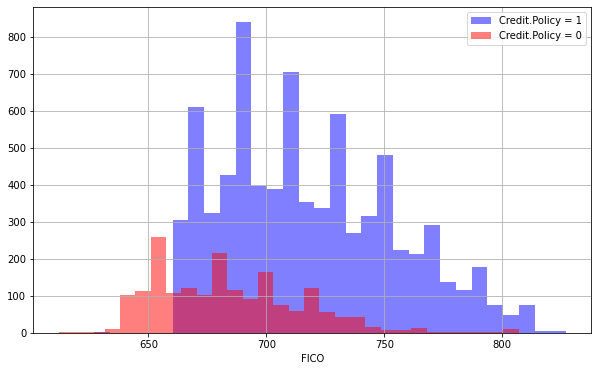

In [122]:
plt.figure(figsize=(10,6))
dataset[dataset['credit.policy'] == 1]['fico'].hist(alpha=0.5,color="blue",bins=30,label="Credit.Policy = 1")
dataset[dataset['credit.policy'] == 0]['fico'].hist(alpha=0.5,color="red",bins=30,label="Credit.Policy = 0")
plt.legend()
plt.xlabel('FICO')

Let's see a similar chart for “not.fully.paid” column.

Text(0.5, 0, 'FICO')

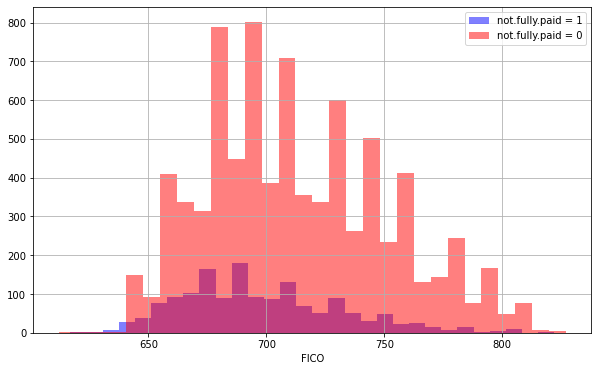

In [123]:
plt.figure(figsize=(10,6))
dataset[dataset['not.fully.paid'] == 1]['fico'].hist(alpha=0.5,color="blue",bins=30,label="not.fully.paid = 1")
dataset[dataset['not.fully.paid'] == 0]['fico'].hist(alpha=0.5,color="red",bins=30,label="not.fully.paid = 0")
plt.legend()
plt.xlabel('FICO')

**Graph based on grouby of loan purpose**

<AxesSubplot:xlabel='purpose', ylabel='count'>

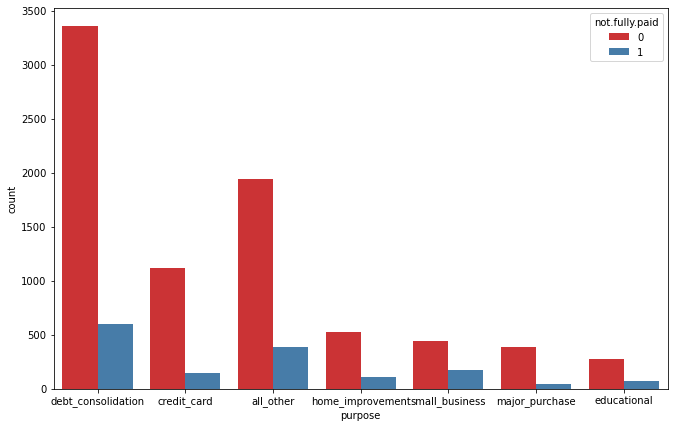

In [124]:
plt.figure(figsize=(11,7))
sns.countplot(x='purpose',hue='not.fully.paid',data=dataset,palette='Set1')

**Trends of FICO and Interest Rate by jointplot**

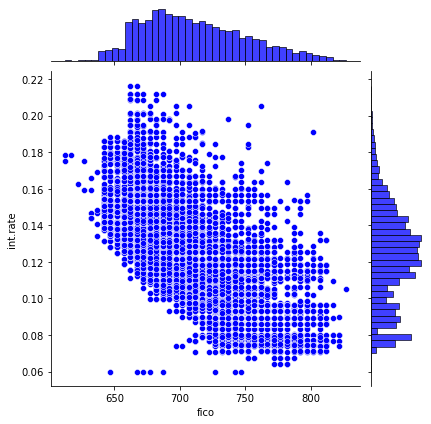

In [125]:
sns.jointplot(x='fico',y='int.rate',data=dataset,color='blue')

**Comparing trend between not.fully.paid and credit.policy**

<Figure size 792x504 with 0 Axes>

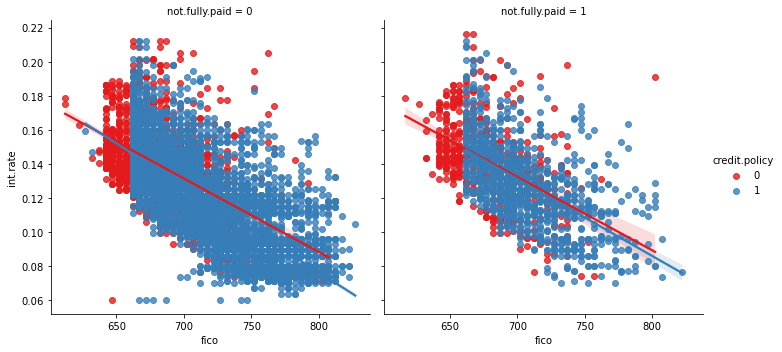

In [126]:
plt.figure(figsize=(11,7))
sns.lmplot(y='int.rate',x='fico',data=dataset,hue='credit.policy', col='not.fully.paid',palette='Set1')

## 3.     Additional Feature Engineering

**Correlation Matrix**

In [128]:
corr = dataset_trans.corr()
corr

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid,purpose_all_other,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_major_purchase,purpose_small_business
credit.policy,1.000000,-0.294089,0.058770,0.034906,-0.090901,0.348319,0.099026,-0.187518,-0.104095,-0.535511,-0.076318,-0.054243,-0.158119,-0.025412,0.003216,0.020193,-0.031346,0.006036,0.024281,-0.003511
int.rate,-0.294089,1.000000,0.276140,0.056383,0.220006,-0.714821,-0.124022,0.092527,0.464837,0.202780,0.156079,0.098162,0.159552,-0.124000,-0.042109,0.123607,-0.019618,-0.050697,-0.068978,0.151247
installment,0.058770,0.276140,1.000000,0.448102,0.050202,0.086039,0.183297,0.233625,0.081356,-0.010419,-0.004368,-0.032760,0.049955,-0.203103,0.000774,0.161658,-0.094510,0.023024,-0.079836,0.145654
log.annual.inc,0.034906,0.056383,0.448102,1.000000,-0.054065,0.114576,0.336896,0.372140,0.054881,0.029171,0.029203,0.016506,-0.033439,-0.080077,0.072942,-0.026214,-0.119799,0.116375,-0.031020,0.091540
dti,-0.090901,0.220006,0.050202,-0.054065,1.000000,-0.241191,0.060101,0.188748,0.337109,0.029189,-0.021792,0.006209,0.037362,-0.125825,0.084476,0.179149,-0.035325,-0.092788,-0.077719,-0.069245
fico,0.348319,-0.714821,0.086039,0.114576,-0.241191,1.000000,0.263880,-0.015553,-0.541289,-0.185293,-0.216340,-0.147592,-0.149666,0.067184,-0.012512,-0.154132,-0.013012,0.097474,0.067129,0.063292
days.with.cr.line,0.099026,-0.124022,0.183297,0.336896,0.060101,0.263880,1.000000,0.229344,-0.024239,-0.041736,0.081374,0.071826,-0.029237,-0.056574,0.046220,-0.009318,-0.042621,0.068087,-0.020561,0.034883
revol.bal,-0.187518,0.092527,0.233625,0.372140,0.188748,-0.015553,0.229344,1.000000,0.203779,0.022394,-0.033243,-0.031010,0.053699,-0.067728,0.072316,0.005785,-0.034743,0.003258,-0.062395,0.083069
revol.util,-0.104095,0.464837,0.081356,0.054881,0.337109,-0.541289,-0.024239,0.203779,1.000000,-0.013880,-0.042740,0.066717,0.082088,-0.138535,0.091321,0.211869,-0.053128,-0.114449,-0.108079,-0.060962
inq.last.6mths,-0.535511,0.202780,-0.010419,0.029171,0.029189,-0.185293,-0.041736,0.022394,-0.013880,1.000000,0.021245,0.072673,0.149452,0.017795,-0.033640,-0.044240,0.024243,0.043827,-0.001445,0.042567


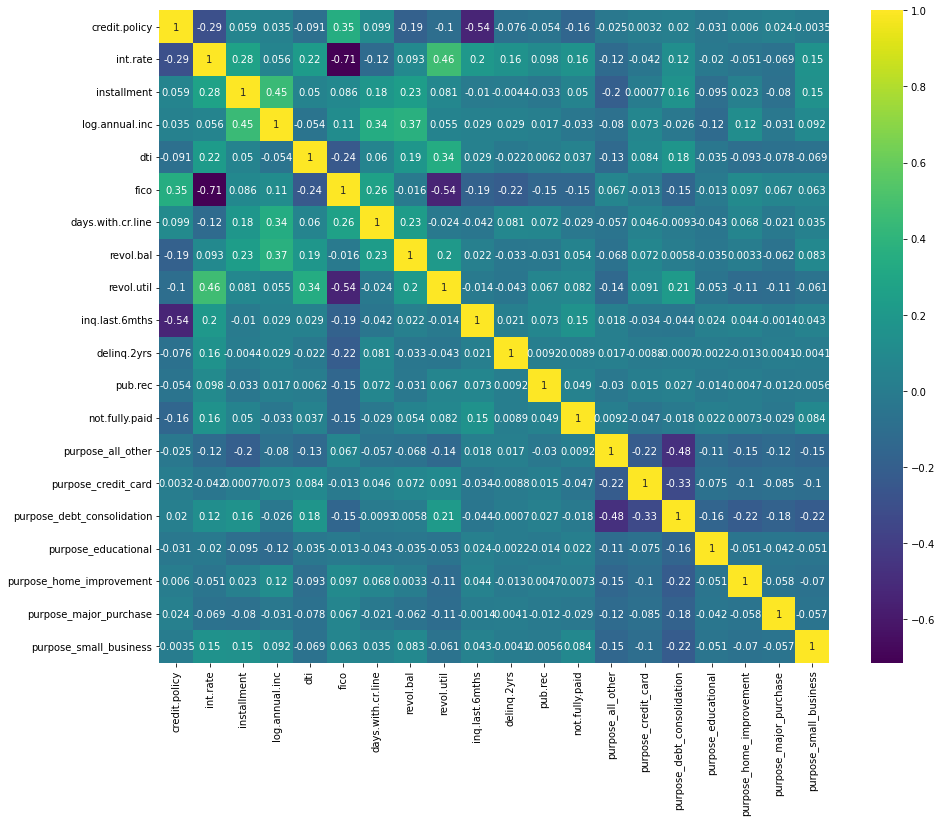

In [129]:
# Plot the heatmap
plt.figure(figsize=(15,12))
sns.heatmap(corr, cmap='viridis', annot = True)
plt.show()